In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
with open('tabular_en-de.json', 'r') as f:
    results = json.load(f)

In [3]:
results.keys()



dict_keys(['mod_vaenmt_cond-planar_4_kl-anneal_50000.0_p_latents_2_particles_4', 'mod_vaenmt_cond-planar_4_kl-anneal_50000.0_p_latents_2_particles_1', 'mod_vaenmt_cond-planar_16_kl-anneal_50000.0_p_latents_2_particles_4', 'mod_vaenmt_cond-planar_1_kl-anneal_50000.0_p_latents_2_particles_4', 'mod_vaenmt_cond-planar_1_kl-anneal_50000.0_p_latents_2_particles_1', 'mod_vaenmt_cond-planar_0_kl-anneal_50000.0_p_latents_2_particles_1', 'mod_vaenmt_cond-planar_0_kl-anneal_50000.0_p_latents_2_particles_4', 'mod_vaenmt_cond-planar_2_kl-anneal_50000.0_p_latents_2_particles_1', 'mod_vaenmt_cond-planar_16_kl-anneal_50000.0_p_latents_2_particles_1', 'mod_vaenmt_cond-planar_8_kl-anneal_50000.0_p_latents_2_particles_1', 'mod_vaenmt_cond-planar_2_kl-anneal_50000.0_p_latents_2_particles_4', 'mod_vaenmt_cond-planar_8_kl-anneal_50000.0_p_latents_2_particles_4'])

In [4]:
def GetBest(bleus):
    return max(bleus.items(), key=lambda x: x[1]['all'])
def GetBestBleus(results):
    ret = {}
    for k, v in results.items():
        ret[k] = GetBest(v)
        
    return ret

In [5]:
GetBest(results['mod_vnmt_planar_16_kl-anneal_50000.0_p_latents_2_particles_4'])

KeyError: 'mod_vnmt_planar_16_kl-anneal_50000.0_p_latents_2_particles_4'

In [7]:
best_results = GetBestBleus(results)
print(type(best_results))

max(best_results.items(), key=lambda x: x[1][1]['all'])
#best_results.items()

<class 'dict'>


('mod_vaenmt_cond-planar_0_kl-anneal_50000.0_p_latents_2_particles_4',
 ('16', {'all-no_latent': 0.05138464443716407, 'all': 17.690110954819552}))

In [8]:
vnmt = dict(filter(lambda x: 'vnmt' in x[0] and 'mod_' not in x[0], best_results.items()))
print(len(vnmt))
vaenmt = dict(filter(lambda x: 'vaenmt' in x[0] and 'mod_' not in x[0], best_results.items()))
print(len(vaenmt))

mod_vaenmt = dict(filter(lambda x: 'mod_vaenmt' in x[0], best_results.items()))
print(len(mod_vaenmt))

mod_vnmt = dict(filter(lambda x: 'mod_vnmt' in x[0], best_results.items()))
print(len(mod_vnmt))

0
0
12
0


In [12]:

for k, v in sorted(mod_vaenmt.items(), key=lambda x: x[0]):
    print(k, v)

mod_vaenmt_cond-planar_0_kl-anneal_50000.0_p_latents_2_particles_1 ('15', {'all-no_latent': 0.9770042085398797, 'all': 17.518189875670984})
mod_vaenmt_cond-planar_0_kl-anneal_50000.0_p_latents_2_particles_4 ('16', {'all-no_latent': 0.05138464443716407, 'all': 17.690110954819552})
mod_vaenmt_cond-planar_16_kl-anneal_50000.0_p_latents_2_particles_1 ('15', {'all-no_latent': 2.984577827995212, 'all': 17.587138659490563})
mod_vaenmt_cond-planar_16_kl-anneal_50000.0_p_latents_2_particles_4 ('1', {'all-no_latent': 7.575560406536772, 'all': 15.751560959976759})
mod_vaenmt_cond-planar_1_kl-anneal_50000.0_p_latents_2_particles_1 ('11', {'all-no_latent': 2.5471278748815718, 'all': 17.392582128168083})
mod_vaenmt_cond-planar_1_kl-anneal_50000.0_p_latents_2_particles_4 ('15', {'all-no_latent': 3.998721429273844, 'all': 17.517167385105086})
mod_vaenmt_cond-planar_2_kl-anneal_50000.0_p_latents_2_particles_1 ('16', {'all-no_latent': 3.1405313175370746, 'all': 17.449334513851014})
mod_vaenmt_cond-plana

4
4
16
1
1
0
0
2
16
8
2
8
[[0, 17.518189875670984], [0, 17.690110954819552], [1, 17.517167385105086], [1, 17.392582128168083], [2, 17.449334513851014], [2, 17.22923481614152], [4, 17.622015050135456], [4, 17.41656556132836], [8, 16.79336332695936], [8, 17.397411864248355], [16, 15.751560959976759], [16, 17.587138659490563]]
4
4
16
1
1
0
0
2
16
8
2
8
[[0, 0.9770042085398797], [0, 0.05138464443716407], [1, 3.998721429273844], [1, 2.5471278748815718], [2, 3.1405313175370746], [2, 4.286390404522931], [4, 2.6730816703953706], [4, 0.2820453566580791], [8, 7.630030805675289], [8, 4.295855303605836], [16, 7.575560406536772], [16, 2.984577827995212]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
start plot
4
1
0
2
16
8
[[0, 17.518189875670984], [1, 17.392582128168083], [2, 17.449334513851014], [4, 17.41656556132836], [8, 16.79336332695936], [16, 17.587138659490563]]
4
1
0
2
16
8
[[0, 0.9770042085398797], [1, 2.5471278748815718], [2, 3.1405313175370746], [4, 0.2820453566580791], [8, 7.630030805675289], 

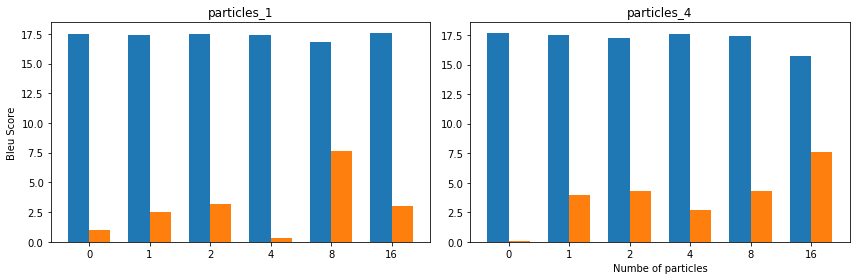

In [14]:
#results = vnmt
#results = mod_vaenmt
#results = {k.split('mod_')[1]: v for k, v in mod_vnmt.items()}
results = {k.split('mod_')[1]: v for k, v in mod_vaenmt.items()}
def FilterValues(results, kl_anneal, value, with_label=False):
    values =[] 
    for exp, item in results.items():
        item= item[-1]
        if  str(kl_anneal) in exp:
            print(exp.split('_')[2])
            z_dim = int(float(exp.split('_cond-planar_')[1].split("_")[0]))
            values.append([z_dim, item[value]])
    values = sorted(values, key=lambda x: x[0])
    print(values)
    return [v[1] for v in values] if not with_label else values



#For visualizing Comparison with and WITHOUT the latent variable Z for changing flows and length of KL annealing
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        """
        ax.annotate('{:6.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
        """


kl_anneal=50000.0
bleus = FilterValues(results, kl_anneal, value='all')

bleus_without_z = FilterValues(results, kl_anneal, value='all-no_latent')


ind = np.arange(len(bleus))  # the x locations for the groups
print(ind)
width = 0.35  # the width of the bars

fig, axis = plt.subplots(1, 2, figsize=(12,4))
print('start plot')
#kl_anneals = [20000.0, 50000.0, 80000.0]
kl_anneals = ["particles_1","particles_4"]
for i, ax in enumerate(np.reshape(axis, (-1, ))):
    kl_anneal = kl_anneals[i]
    bleus = FilterValues(results, kl_anneal, value='all', with_label=True)
    
    ind = np.arange(len(bleus))
    bleus_without_z = FilterValues(results, kl_anneal, value='all-no_latent')
    
    rects1 = ax.bar(ind - width/2, [b[1] for b in bleus], width, #yerr=men_std,
                label='With Z')
    rects2 = ax.bar(ind + width/2, bleus_without_z, width, #yerr=women_std,
                label='Without Z')
    autolabel(rects1, "left")
    autolabel(rects2, "right")

# Add some text for labels, title and custom x-axis tick labels, etc.
    
    #ax.set_title('Kl Annealed for {} Steps'.format(kl_anneal))
    ax.set_title('{}'.format(kl_anneal))
    ax.set_xticks(ind)
    ax.set_xticklabels([b[0] for b in bleus])
    #ax.set_xticklabels([1, 2, 8, 64, 256, 512]) #[0] + [2**i for i in range(8)])
    #ax.set_xticklabels([0, 1, 2, 4, 8, 16, 32])
    if i == 0:
        ax.set_ylabel('Bleu Score')
    if i == 2:
        ax.legend()
    if i == 1:
        ax.set_xlabel("Numbe of particles")




fig.tight_layout()

plt.show()

In [19]:
#kl_anneals = ["particles_1","particles_4"]
anneal = "particles_1"
#results = vnmt
#results = vaenmt
#results = {k.split('mod_')[1]: v for k, v in mod_vnmt.items()}
results = {k.split('mod_')[1]: v for k, v in mod_vaenmt.items()}
FilterValues(results, anneal, 'all', True)


4
1
0
2
16
8
[[0, 17.518189875670984], [1, 17.392582128168083], [2, 17.449334513851014], [4, 17.41656556132836], [8, 16.79336332695936], [16, 17.587138659490563]]


[[0, 17.518189875670984],
 [1, 17.392582128168083],
 [2, 17.449334513851014],
 [4, 17.41656556132836],
 [8, 16.79336332695936],
 [16, 17.587138659490563]]

In [20]:
for v in FilterValues(results, anneal, 'all', False):
    print(v)



4
1
0
2
16
8
[[0, 17.518189875670984], [1, 17.392582128168083], [2, 17.449334513851014], [4, 17.41656556132836], [8, 16.79336332695936], [16, 17.587138659490563]]
17.518189875670984
17.392582128168083
17.449334513851014
17.41656556132836
16.79336332695936
17.587138659490563


In [47]:
FilterValues(results, anneal, 'all-no_latent', True)

80000.0
80000.0
80000.0
80000.0
[[1, 6.945219182369338], [64, 2.0660222473444594], [256, 1.9810828131918905], [512, 1.1255656126614004]]


[[1, 6.945219182369338],
 [64, 2.0660222473444594],
 [256, 1.9810828131918905],
 [512, 1.1255656126614004]]